In [80]:
import pandas as pd
import numpy as np


df = pd.read_csv('res/ObesityDataSet_Clean_Without_HeightWeight.csv')
df_Full = pd.read_csv('res/ObesityDataSet_Clean_WithAllColumns.csv')
df_Full.head()


,Gender,Age,Height,Weight,Family_History_Overweight,High_Caloric_Intake,Vegetables_Intake,Daily_Main_Meals,Food_Between_Meals,Smoker,Daily_Water_Consumption,Calories_Monitored,Physical_Activity,HowMuch_Time_Tech_Devices,Alcohol_Consumption,Transport_Method,NObeyesdad
0,0,21,1.62,64.0,1,0,2,3,1,0,2,0,0,1,0,3,1
1,0,21,1.52,56.0,1,0,3,3,1,1,3,1,3,0,1,3,1
2,1,23,1.80,77.0,1,0,2,3,1,0,2,0,2,1,2,3,1
3,1,27,1.80,87.0,0,0,3,3,1,0,2,0,2,0,2,0,2
4,1,22,1.78,89.8,0,0,2,1,1,0,2,0,0,0,1,3,3


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score

# Dividir el dataset en train y test
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Vars to normalize
varsToNormalize = ['Age','Physical_Activity','HowMuch_Time_Tech_Devices','Daily_Water_Consumption','Vegetables_Intake','Daily_Main_Meals']
# Normalizar las variables
scaler = StandardScaler()
X_train[varsToNormalize] = scaler.fit_transform(X_train[varsToNormalize])
X_test[varsToNormalize] = scaler.transform(X_test[varsToNormalize])

# Crear el clasificador KNN
knn = KNeighborsClassifier(n_neighbors=3)
# Entrenar el clasificador
knn.fit(X_train, y_train)
# Predecir en el conjunto de test
y_pred = knn.predict(X_test)
#Printeamos la matriz de confusión el accuracy y el balanced accuracy
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[60  5  6  5  4  1  5]
 [20 29 15  7 11  8  3]
 [ 8  9 49  4  8  8  2]
 [ 6  8  7 31 17  8  2]
 [ 5  8  8 10 63  7  1]
 [ 7  0  1  2  3 75  0]
 [ 0  1  1  0  0  0 96]]
              precision    recall  f1-score   support

           0       0.57      0.70      0.62        86
           1       0.48      0.31      0.38        93
           2       0.56      0.56      0.56        88
           3       0.53      0.39      0.45        79
           4       0.59      0.62      0.61       102
           5       0.70      0.85      0.77        88
           6       0.88      0.98      0.93        98

    accuracy                           0.64       634
   macro avg       0.62      0.63      0.62       634
weighted avg       0.62      0.64      0.62       634



In [82]:
#hacemos lo mismo pero con el dataset que tiene todas las columnas
X_full = df_Full.drop('NObeyesdad', axis=1)
y_full = df_Full['NObeyesdad']
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.3, random_state=42)
# Normalizar las variables
scaler_full = StandardScaler()
X_train_full[varsToNormalize] = scaler_full.fit_transform(X_train_full[varsToNormalize])
X_test_full[varsToNormalize] = scaler_full.transform(X_test_full[varsToNormalize])
# Crear el clasificador KNN
knn_full = KNeighborsClassifier(n_neighbors=3)
# Entrenar el clasificador
knn_full.fit(X_train_full, y_train_full)
# Predecir en el conjunto de test
y_pred_full = knn_full.predict(X_test_full)
#Printeamos la matriz de confusión el accuracy y el balanced accuracy
print(confusion_matrix(y_test_full, y_pred_full))
print(classification_report(y_test_full, y_pred_full))
#Hacemos balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_test_full, y_pred_full)
print(f'Balanced Accuracy: {balanced_accuracy}')


[[83  3  0  0  0  0  0]
 [22 47 17  6  1  0  0]
 [ 1  7 76  4  0  0  0]
 [ 0  6  4 60  7  2  0]
 [ 0  0  4  2 93  2  1]
 [ 0  0  0  0  0 88  0]
 [ 0  0  0  0  0  0 98]]
              precision    recall  f1-score   support

           0       0.78      0.97      0.86        86
           1       0.75      0.51      0.60        93
           2       0.75      0.86      0.80        88
           3       0.83      0.76      0.79        79
           4       0.92      0.91      0.92       102
           5       0.96      1.00      0.98        88
           6       0.99      1.00      0.99        98

    accuracy                           0.86       634
   macro avg       0.85      0.86      0.85       634
weighted avg       0.86      0.86      0.85       634

Balanced Accuracy: 0.8579124805086545


# Vamos a graficar con un heatmap los resultados de los 6 tipos de Nobeyesdad

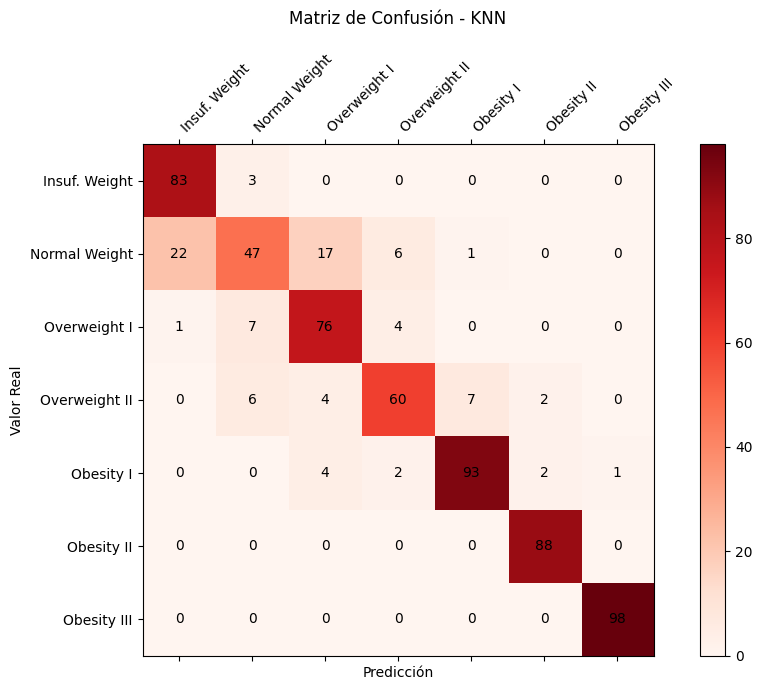

In [83]:
import matplotlib.pyplot as plt

# Recalculamos la matriz de confusión
cm = confusion_matrix(y_test_full, y_pred_full)

labels = [
    'Insuf. Weight', 'Normal Weight', 'Overweight I',
    'Overweight II', 'Obesity I', 'Obesity II', 'Obesity III'
]

fig, ax = plt.subplots(figsize=(10, 7))
cax = ax.matshow(cm, cmap=plt.cm.Reds)

fig.colorbar(cax)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='left')
ax.set_yticklabels(labels)

# Etiquetas
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - KNN', pad=20)

for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()


# Ahora vamos a hacer arboles de decisión

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#Recargamos el dataset
df = pd.read_csv('res/ObesityDataSet_Clean_WithAllColumns.csv')


In [85]:
# Dividir el dataset en train y test
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Crear el clasificador de árboles de decisión
tree = DecisionTreeClassifier(random_state=42)
# Entrenar el clasificador
tree.fit(X_train, y_train)
# Predecir en el conjunto de test
y_pred_tree = tree.predict(X_test)
#Printeamos la matriz de confusión el accuracy y el balanced accuracy
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
#Hacemos balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_tree)
print(f'Balanced Accuracy: {balanced_accuracy}')


[[82  4  0  0  0  0  0]
 [ 8 78  7  0  0  0  0]
 [ 0  8 77  3  0  0  0]
 [ 0  0  5 74  0  0  0]
 [ 0  1  0  3 93  5  0]
 [ 0  0  0  0  2 86  0]
 [ 0  0  0  0  1  0 97]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        86
           1       0.86      0.84      0.85        93
           2       0.87      0.88      0.87        88
           3       0.93      0.94      0.93        79
           4       0.97      0.91      0.94       102
           5       0.95      0.98      0.96        88
           6       1.00      0.99      0.99        98

    accuracy                           0.93       634
   macro avg       0.92      0.93      0.93       634
weighted avg       0.93      0.93      0.93       634

Balanced Accuracy: 0.9261057516848998


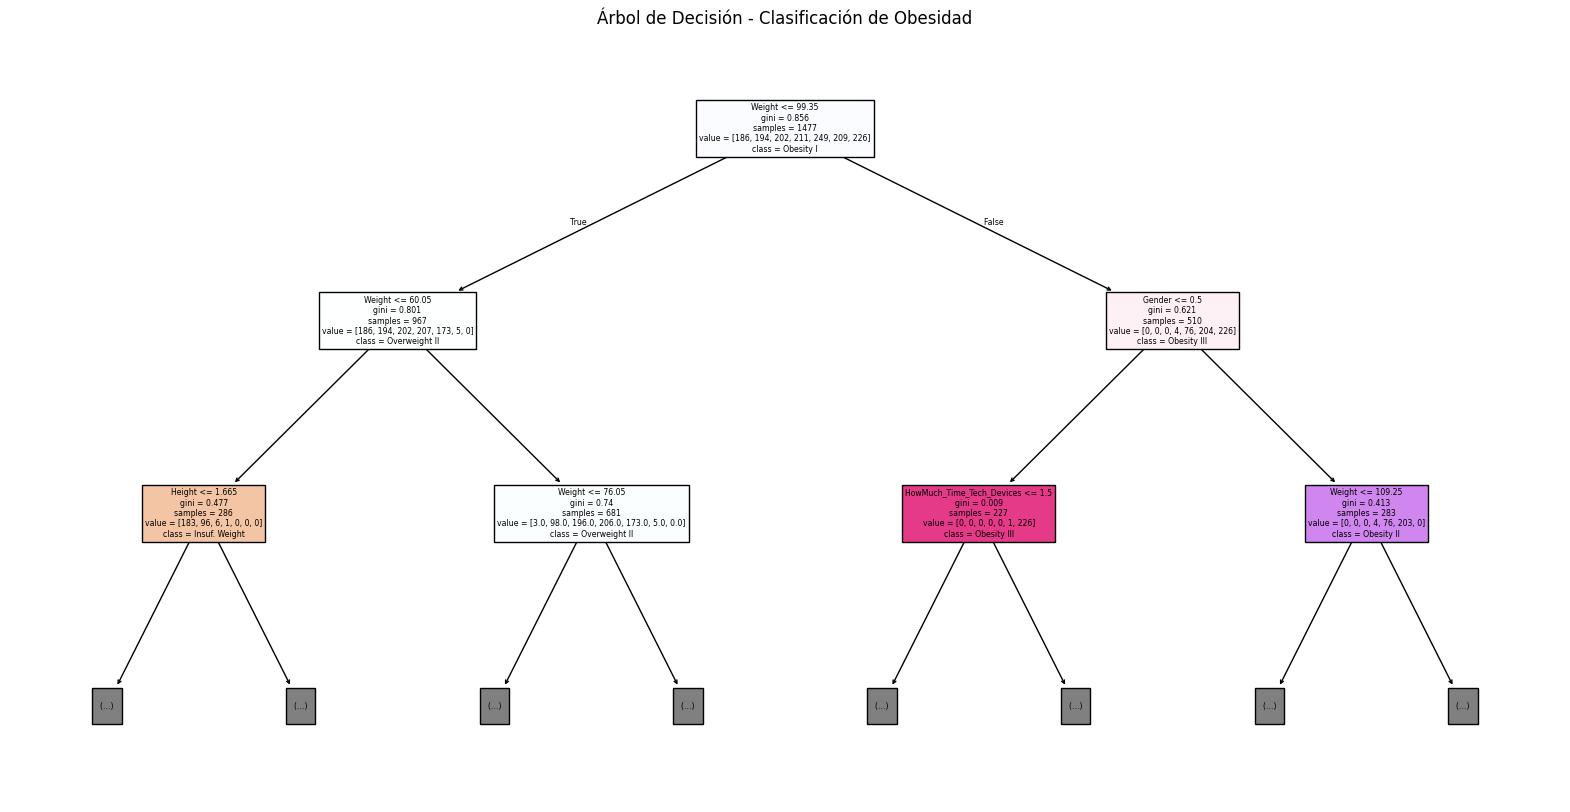

In [86]:
#Ploteamos el arbol

class_names = [
    'Insuf. Weight', 'Normal Weight', 'Overweight I',
    'Overweight II', 'Obesity I', 'Obesity II', 'Obesity III'
]


plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, class_names=class_names, filled=True ,max_depth=2)
plt.title('Árbol de Decisión - Clasificación de Obesidad')
plt.show()

# Check de overfitting

In [87]:
# Predicciones sobre entrenamiento
y_train_pred = tree.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)

# Predicciones sobre test
y_test_pred = tree.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

print(f'Accuracy en entrenamiento: {train_acc:.2f}')
print(f'Accuracy en test: {test_acc:.2f}')


Accuracy en entrenamiento: 1.00
Accuracy en test: 0.93


### Vamos a Hacer análisis de Regresión lineal para predecir el peso

Error cuadrático medio: 29.95
R^2: 0.96


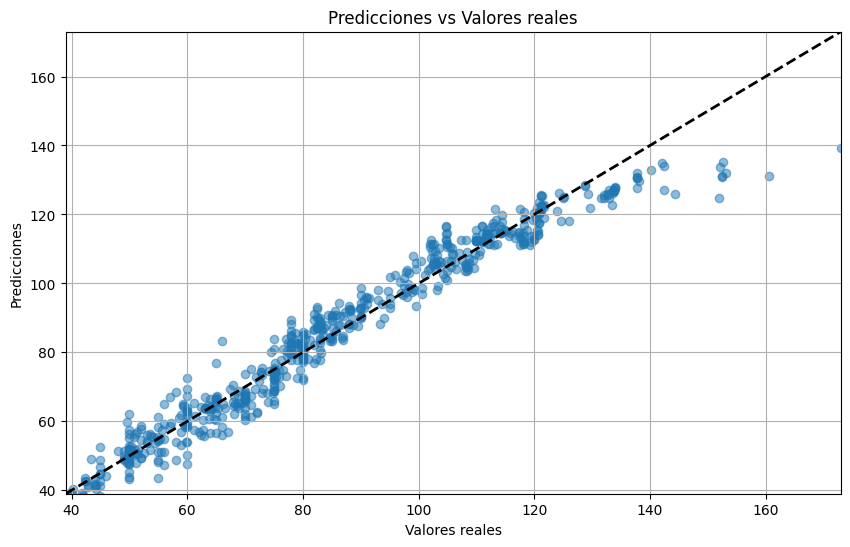

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dividir el dataset en train y test
X = df.drop('Weight', axis=1)
y = df['Weight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Normalizar las variables
scaler = StandardScaler()
X_train[varsToNormalize] = scaler.fit_transform(X_train[varsToNormalize])
X_test[varsToNormalize] = scaler.transform(X_test[varsToNormalize])
# Crear el modelo de regresión lineal
model = LinearRegression()
# Entrenar el modelo
model.fit(X_train, y_train)
# Predecir en el conjunto de test
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio y el R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error cuadrático medio: {mse:.2f}')
print(f'R^2: {r2:.2f}')

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales')
plt.xlim(y.min(), y.max())
plt.ylim(y.min(), y.max())
plt.grid()
plt.show()




## Vamos a hacer clasificación con K-means para clasificar personas por sus habitos deportivos o alimenticios

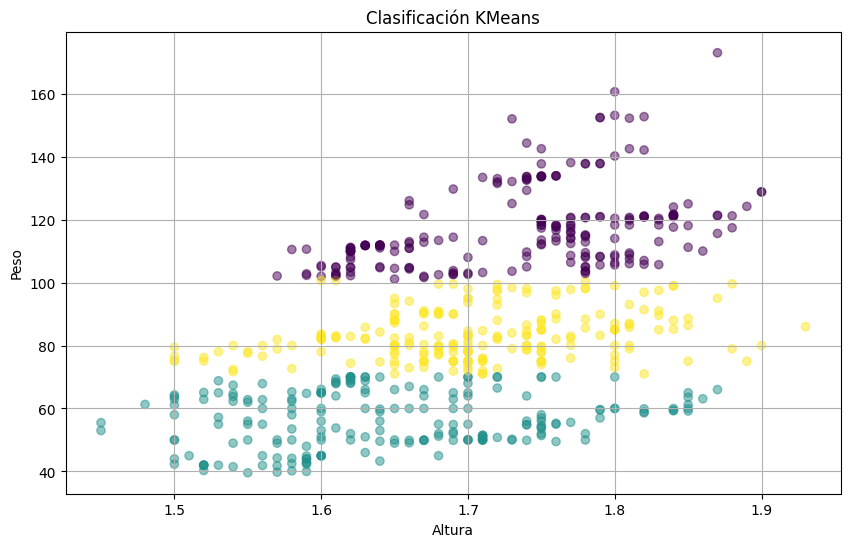

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos el dataset
df = pd.read_csv('res/ObesityDataSet_Clean_WithAllColumns.csv')
#Separamos en entrenamiento y test
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']
# Dividir el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Normalizar las variables
scaler = StandardScaler()
X_train[varsToNormalize] = scaler.fit_transform(X_train[varsToNormalize])
X_test[varsToNormalize] = scaler.transform(X_test[varsToNormalize])
# Crear el modelo KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
# Entrenar el modelo
kmeans.fit(X_train)
# Predecir los clusters
y_pred = kmeans.predict(X_test)
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Height'], X_test['Weight'], c=y_pred, cmap='viridis', alpha=0.5)
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.title('Clasificación KMeans')
plt.grid()
plt.show(
)

In [90]:
# Stati